In [1]:
import numpy as np
import sklearn
import sklearn.datasets as ds
import sklearn.cross_validation as cv
import sklearn.neighbors as nb
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
digits = ds.load_digits()
X = digits.data
Y = digits.target
print((X.min(), X.max()))
print(X.shape)

(0.0, 16.0)
(1797, 64)


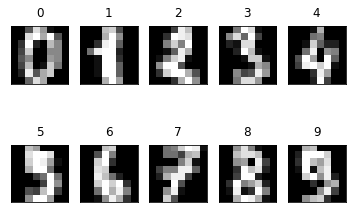

In [3]:
nrows, ncols = 2, 5
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([]) #縦横の目盛りを非表示
    plt.title(digits.target[i])

In [4]:
# このデータをK近傍分類器にかける
(X_train, X_test, Y_train, Y_test) = cv.train_test_split(X, Y, test_size=.25)

In [5]:
knc = nb.KNeighborsClassifier()

In [6]:
knc.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [7]:
knc.score(X_test, Y_test)

0.98666666666666669

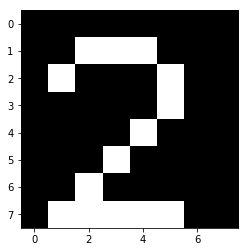

In [14]:
# Let's draw a 1.
one = np.zeros((8,8))
one[1:-1, 4] = 16 #the image values are in [0,16]
one[2,3] = 16
two = np.array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
             [  0.,   0.,  16.,  16.,  16.,   0.,   0.,   0.],
             [  0.,  16.,   0.,   0.,   0.,  16.,   0.,   0.],
             [  0.,   0.,   0.,   0.,   0.,  16.,   0.,   0.],
             [  0.,   0.,   0.,   0.,  16.,   0.,   0.,   0.],
             [  0.,   0.,   0.,  16.,   0.,   0.,   0.,   0.],
             [  0.,   0.,  16.,   0.,   0.,   0.,   0.,   0.],
             [  0.,  16.,  16.,  16.,  16.,  16.,   0.,   0.]])
plt.imshow(two, interpolation='none')

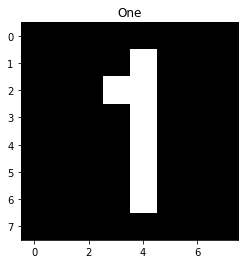

In [9]:
plt.imshow(one, interpolation='none')
plt.grid(False)
plt.xticks(); plt.yticks()
plt.title("One")

In [16]:
print(knc.predict(one.ravel()))
print(knc.predict(two.ravel()))

[1]
[2]


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
